# Stochastic BornhuetterFerguson

In [1]:
import chainladder as cl

We see how to use the :class:`BootstrapODPSample` and :class:`BornhuetterFerguson`
to come up with a stochastic view of the Bornhuetter-Ferguson method.  This can
be done with any deterministic IBNR method which makes bootstraping so versatile.


In [2]:
import chainladder as cl

# Simulation parameters
random_state = 42
n_sims = 1000

# Get data
loss = cl.load_sample('genins')
premium = loss.latest_diagonal * 0 + 8e6

# Simulate loss triangles
sim = cl.BootstrapODPSample(random_state=random_state, n_sims=n_sims)
sim.fit(loss, sample_weight=premium)


# Fit Bornhuetter-Ferguson to stochastically generated data
model = cl.BornhuetterFerguson(0.65, apriori_sigma=0.10)
model.fit(sim.resampled_triangles_, sample_weight=premium)

# Grab completed triangle replacing simulated known data with actual known data
full_triangle = (model.full_triangle_ - model.X_ + loss) / premium

# Limiting to the current year for plotting
current_year = full_triangle[full_triangle.origin==full_triangle.origin.max()].to_frame().T

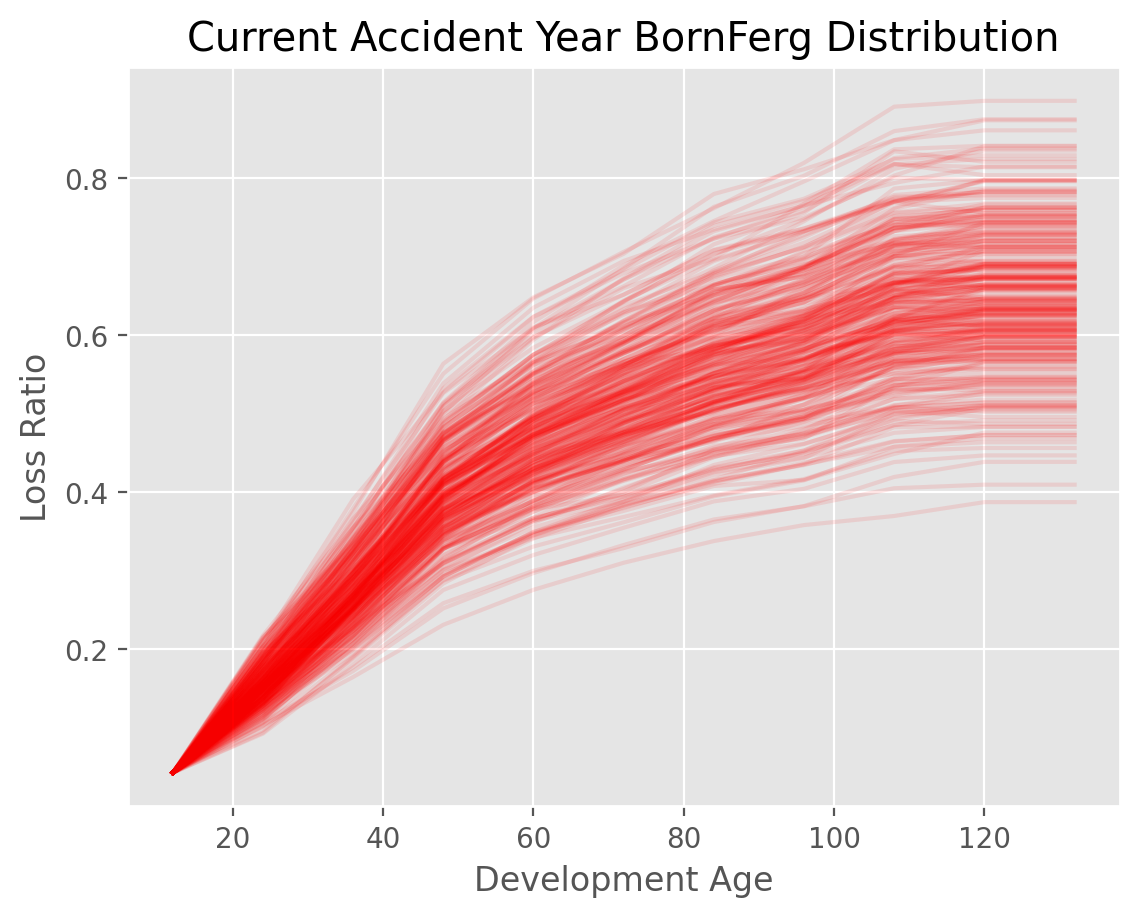

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

# Plot the data
ax = current_year.iloc[:-1, :300].plot(
    legend=False, alpha=0.1, color='red',    
    xlabel='Development Age', ylabel='Loss Ratio',
    title='Current Accident Year BornFerg Distribution');